# Importing required libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation
from numba import njit
import time
from celluloid import Camera
from scipy.signal import find_peaks
from tqdm import tqdm

# Creating Knot Coordinate Files

<IPython.core.display.Javascript object>


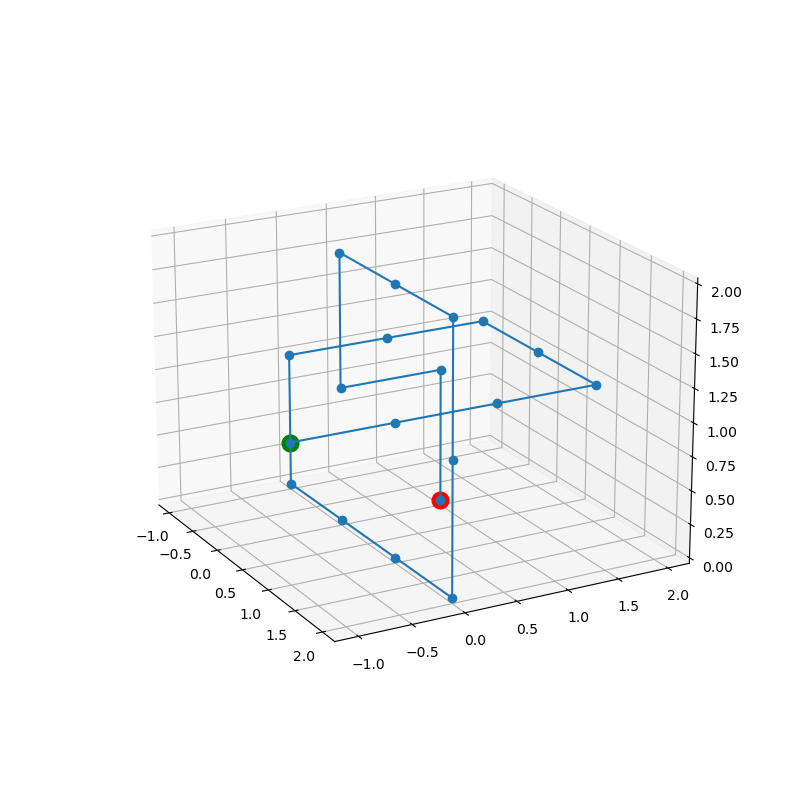

In [2]:
coords=np.loadtxt('trefoil_lattice.txt')
coords=np.delete(coords, [-1, -2, -3, -4, -5], 0)

first, last = coords[0], coords[-1]

%matplotlib notebook

fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")

ax.plot(coords[0, 0], coords[0, 1], coords[0, 2], 'o', color='green', ms=12)
ax.plot(coords[-1, 0], coords[-1, 1], coords[-1, 2], 'o', color='red', ms=12)
ax.plot(coords[:, 0], coords[:, 1], coords[:, 2], 'o-')

In [3]:
morecoords=np.copy(coords)
idx=1
for i in range(len(coords)-1):
    pt1, pt2 = coords[i], coords[i+1]
    pt3, pt4 = (2*pt1+pt2)/3, (pt1+2*pt2)/3
    morecoords = np.insert(morecoords, idx, [pt3, pt4], axis=0)
    idx+=3

print(len(morecoords))
morecoords*=3

print(np.linalg.norm(morecoords[-1]-morecoords[-2]))

55
1.0


<IPython.core.display.Javascript object>


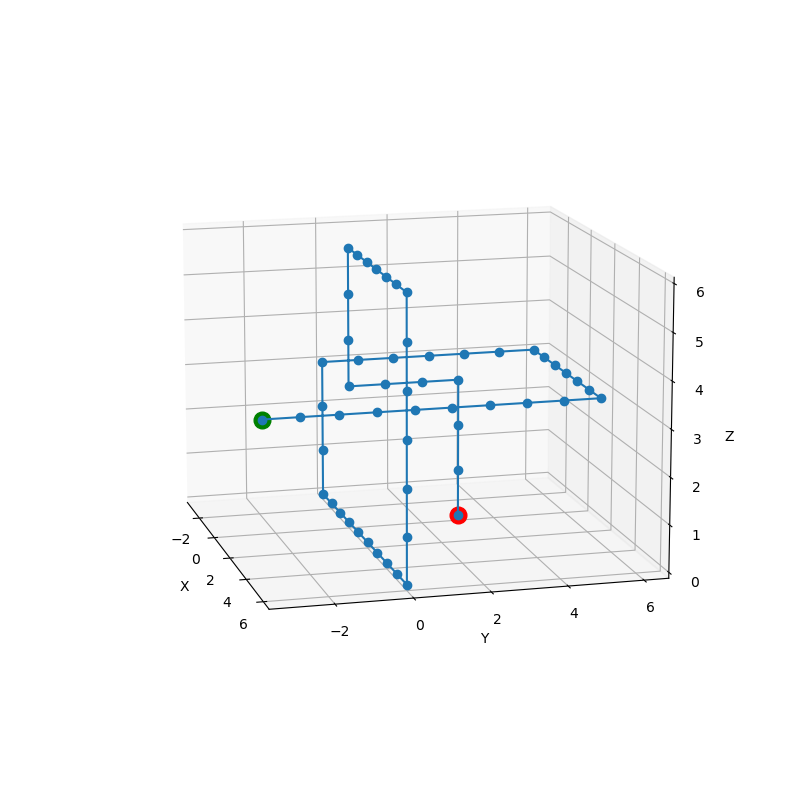

Text(0.5, 0, 'Z')

In [4]:
fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")

ax.plot(morecoords[0, 0], morecoords[0, 1], morecoords[0, 2], 'o', color='green', ms=12)
ax.plot(morecoords[-1, 0], morecoords[-1, 1], morecoords[-1, 2], 'o', color='red', ms=12)
ax.plot(morecoords[:, 0], morecoords[:, 1], morecoords[:, 2], 'o-')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [5]:
for i in range(5):
    first= morecoords[0]
    morecoords=np.insert(morecoords, 0, [first[0], first[1]-1.0, first[2]], axis=0)
    
for i in range(5):
    first= morecoords[0]
    morecoords=np.insert(morecoords, 0, [first[0], first[1], first[2]-1.0], axis=0)
    
for i in range(5):
    first= morecoords[0]
    morecoords=np.insert(morecoords, 0, [first[0], first[1]-1.0, first[2]], axis=0)


for i in range(10):
    last = morecoords[-1]
    morecoords=np.insert(morecoords, len(morecoords), [last[0], last[1]+1.0, last[2]], axis=0)

for i in range(10):
    last = morecoords[-1]
    morecoords=np.insert(morecoords, len(morecoords), [last[0], last[1], last[2]-1.0], axis=0)
    
for i in range(10):
    last = morecoords[-1]
    morecoords=np.insert(morecoords, len(morecoords), [last[0], last[1]+1.0, last[2]], axis=0)
    
morecoords*=(2)**(1/6)

<IPython.core.display.Javascript object>


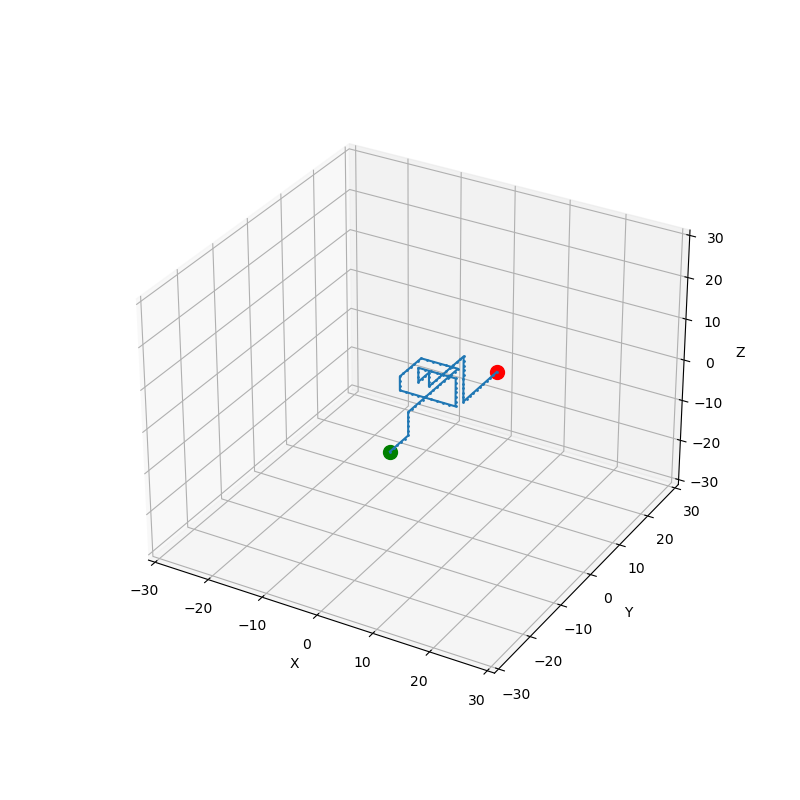

In [6]:
fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")

ax.plot(morecoords[0, 0], morecoords[0, 1], morecoords[0, 2], 'o', color='green', ms=10)
ax.plot(morecoords[-1, 0], morecoords[-1, 1], morecoords[-1, 2], 'o', color='red', ms=10)
ax.plot(morecoords[:, 0], morecoords[:, 1], morecoords[:, 2], 'o-', ms=1)

ax.set(xlim3d=(-30, 30), xlabel='X')
ax.set(ylim3d=(-30, 30), ylabel='Y')
ax.set(zlim3d=(-30, 30), zlabel='Z')

np.savetxt('sidetref.txt', morecoords)

In [7]:
len(morecoords)

100

# Reading, processing datafiles + making xyz file for VMD

In [8]:
def gen_data(filename, bp):
    with open(filename, 'r') as f:
        lines=f.readlines()
    lines=lines[bp+3:]
    lines=[x.strip() for x in lines]
    for idx, line in enumerate(lines):
        line=line.replace('-', ' -')
        temp=line.split()        
        if len(temp)==3:
            lines[idx]=[float(x) for x in temp]
    return lines

## Plotting Trefoil Dynamics on Semi-Tight Chain

### With LJ wall

### This simulation has 100 beads, stuck between two walls situated on two XZ-planes. There are a total of 1000 frames (~ 10^7 timesteps of evolution).

In [13]:
bp=100

#seed=np.random.randint(1,11)
#print('seed is ', seed)
seed=3
datafolder='/home/souradeep/Coding/dna_knots/100bp_LJconf_sideknot/seed{}/'.format(seed)
moviedat=datafolder+'traj_0.000_0.225_100bp_dt0.005_topo_endfree.dat'
lines=gen_data(moviedat, bp)

<IPython.core.display.Javascript object>


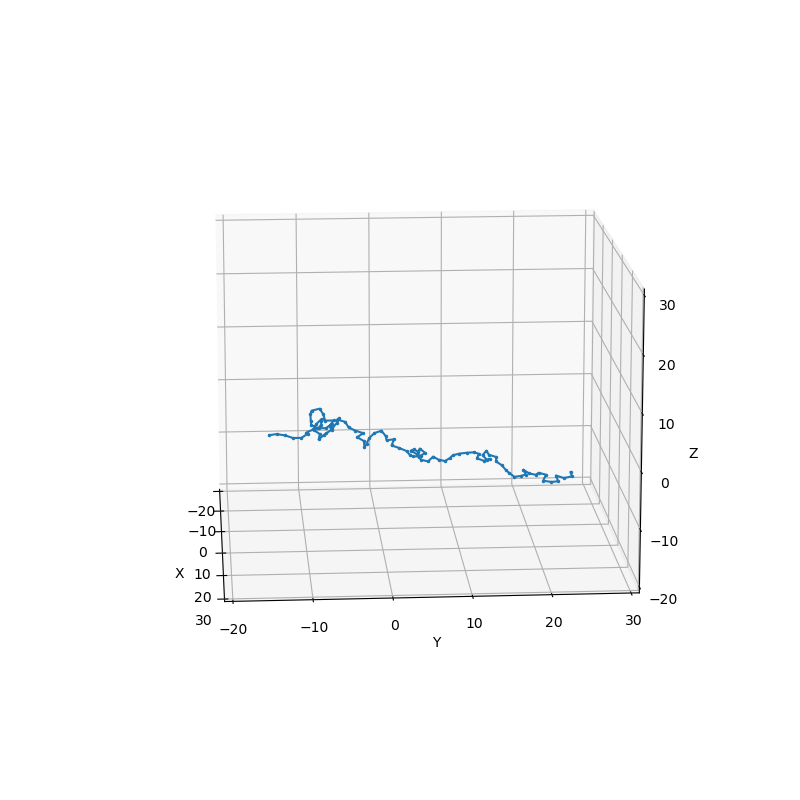

In [10]:
%matplotlib notebook

def update_coords(i, lines, line):
    iters=10000
    bp=100
    elem=str(iters*(i+1))
    idx=lines.index(elem)+1
    piece=np.array(lines[idx:idx+bp])
    line.set_data(piece[:, 0], piece[:, 1])
    line.set_3d_properties(piece[:, 2])
    line.set_linestyle('-')
    line.set_marker('o')
    line.set_markersize(1.5)
    return line

fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")

line=ax.plot([], [], [])[0]
ax.set(xlim3d=(-20, 30), xlabel='X')
ax.set(ylim3d=(-20, 30), ylabel='Y')
ax.set(zlim3d=(-20, 30), zlabel='Z')
#above three lines sets the limits on x, y, z coordinates visualized. 
ax.view_init(14, -4)
#this line sets the initial angle of viewing, two parameters are elevation angle and azimuthal angle. 

ani = animation.FuncAnimation(
    fig, update_coords, frames=range(520,550), fargs=(lines, line), interval=20)
# Frames = total number of frames to plot, interval = time interval between two frames in ms
#change as required

#ani.save('knot_sideknot_LJwall.mp4', fps=24, extra_args=['-vcodec', 'libx264'])
#above line if uncommented renders a video of the simulation

plt.show()

### Without LJ wall, but ends fixed

In [11]:
bp=100

#seed=np.random.randint(1,11)
#print('seed is ', seed)
#seed=3
#datafolder='/home/souradeep/Coding/dna_knots/100bp_LJconf_sideknot/seed{}/'.format(seed)
moviedat='100bp_LJconf_sideknot/no_wall (seed3)/traj_0.000_0.225_100bp_dt0.005_topo_endfree.dat'
lines=gen_data(moviedat, bp)

<IPython.core.display.Javascript object>


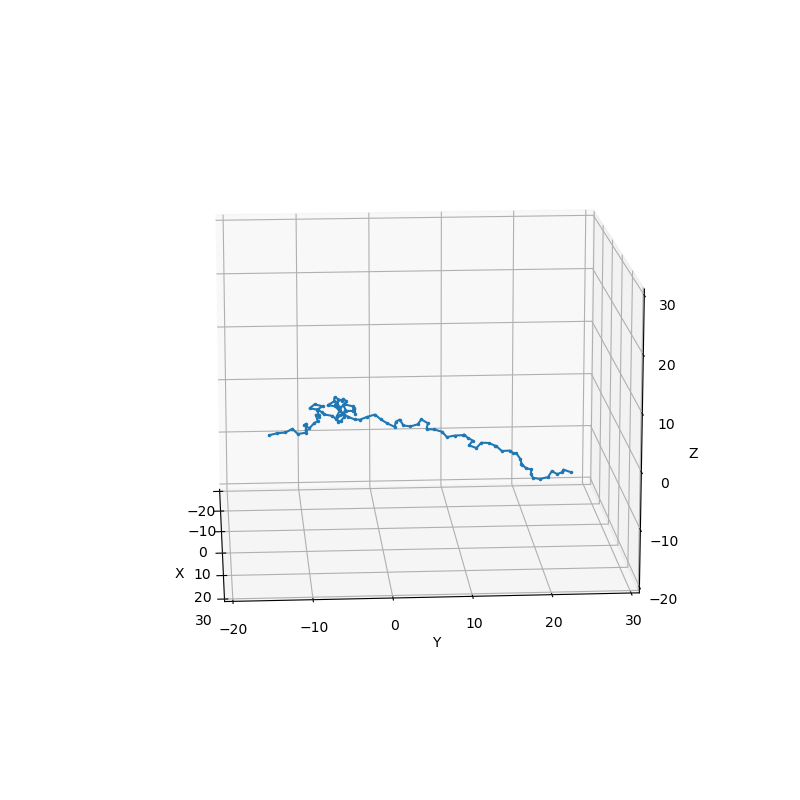

In [12]:
%matplotlib notebook

def update_coords(i, lines, line):
    iters=10000
    bp=100
    elem=str(iters*(i+1))
    idx=lines.index(elem)+1
    piece=np.array(lines[idx:idx+bp])
    line.set_data(piece[:, 0], piece[:, 1])
    line.set_3d_properties(piece[:, 2])
    line.set_linestyle('-')
    line.set_marker('o')
    line.set_markersize(1.5)
    return line

fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")

line=ax.plot([], [], [])[0]
ax.set(xlim3d=(-20, 30), xlabel='X')
ax.set(ylim3d=(-20, 30), ylabel='Y')
ax.set(zlim3d=(-20, 30), zlabel='Z')
#above three lines sets the limits on x, y, z coordinates visualized. 
ax.view_init(14, -4)
#this line sets the initial angle of viewing, two parameters are elevation angle and azimuthal angle. 

ani = animation.FuncAnimation(
    fig, update_coords, frames=1000, fargs=(lines, line), interval=10)
# Frames = total number of frames to plot, interval = time interval between two frames in ms
#change as required

#ani.save('knot_sideknot_nowall.mp4', fps=24, extra_args=['-vcodec', 'libx264'])
#above line if uncommented renders a video of the simulation

plt.show()

## Creating xyz file from coord.dat

In [ ]:
#xyzfile=open(datafolder+'seed{}.xyz'.format(seed), 'w')
#xyzfile.write('99\n')
#for line in lines:
#    if 'continue' in line:
#        xyzfile.write('99\n')
#    elif type(line)==str:
#        xyzfile.write('\n')
#    else:
#        line=[str(elem) for elem in line]
#        line.insert(0, 'C')
#        xyzfile.write('\t'.join(line))
#        xyzfile.write('\n')    
#xyzfile.close()

# Scanning to Locate and Track the Knot

In [14]:
def box_scan(lines, bp, iters, timestep, step):
    first, last = lines[1][1], lines[bp][1]
    locs=np.arange(first, last+step, step)
    datarr=np.zeros((len(locs)-1, iters))
    for i in range(iters):
        elem=str(timestep*(i+1))
        idx=lines.index(elem)+1
        piece=np.array(lines[idx:idx+bp])
        for j in range(len(locs)-1):
            for k in range(len(piece)):
                if (piece[k,1]>=locs[j]) and (piece[k,1]<=locs[j+1]):
                    datarr[j,i]+=1
    return locs, datarr

In [15]:
def time_avg(datarr, step, iters):
    avgarr=np.empty((len(datarr), iters-step))
    for i in range(iters-step):
        avgarr[:,i]=np.mean(datarr[:,i:i+step], axis=1)
    return avgarr

In [16]:
@njit
def diff_track(datarr, locs, bp, iters, step):
    length=iters-step
    locmax=np.empty(length)
    maxidx=np.argmax(datarr, axis=0)
    initial=locs[maxidx[0]]
    for i in range(len(maxidx)):
        diff=(0.2*(locs[maxidx[i-1]]+locs[maxidx[i]])) - initial
        locmax[i]=diff**2
    return locmax

In [48]:
bp, iters, step, timestep, locstep = 155, 10000, 50, 10000, 2**(1/6)
locmax=np.empty((10, iters-step))
datstr='155bp_t100_LJloose/seed'

for i in tqdm(range(1,11)):
    moviedat=datstr+'{}/traj_0.000_0.100_155bp_dt0.005_topo_endfree.dat'.format(i)
    lines=gen_data(moviedat, bp)
    locs, info=box_scan(lines, bp, iters, timestep, locstep)
    avginfo=time_avg(info, step, iters)
    locmax[i-1]=diff_track(avginfo, locs, 10000, 10000, 50)
    
np.savetxt('155bp_t100_LJloose_diffavg.txt', locmax)

100%|███████████████████████████████████████████| 10/10 [09:31<00:00, 57.11s/it]


<IPython.core.display.Javascript object>


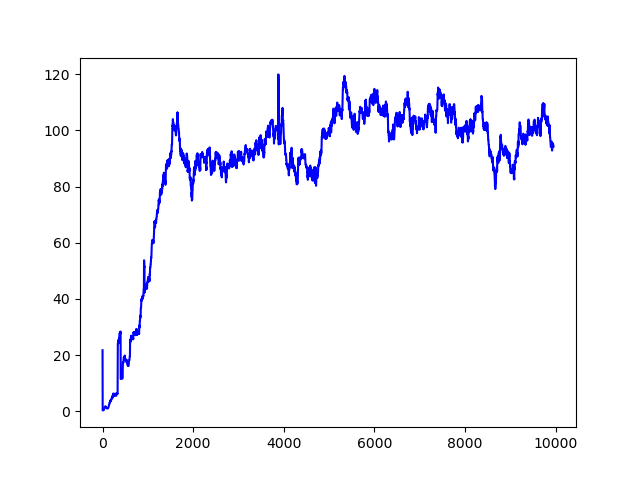

In [17]:
locmax=np.loadtxt('155bp_t100_LJloose_diffavg.txt')
diffavg=np.mean(locmax, axis=0)


plt.figure()
plt.plot(diffavg, 'b-')

225, tight probseeds = 2, 3, 7, 8, 9, 10

225, loose probseeds = 5, 7, 10

100, tight/loose probseeds = none/none



In [51]:
bp=155

#seed=np.random.randint(1,11)
#print('seed is ', seed)
seed=5
datafolder='/home/souradeep/Coding/dna_knots/155bp_t100_LJloose/seed{}/'.format(seed)
moviedat=datafolder+'traj_0.000_0.100_155bp_dt0.005_topo_endfree.dat'
lines=gen_data(moviedat, bp)

<IPython.core.display.Javascript object>


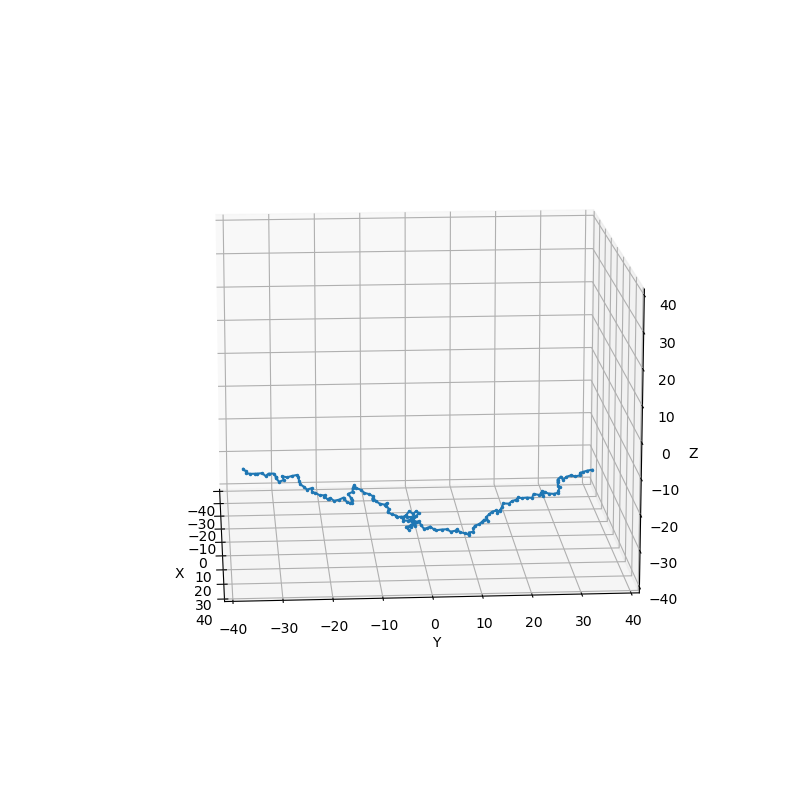

In [54]:
%matplotlib notebook

def update_coords(i, lines, line):
    iters=10000
    bp=155
    elem=str(iters*(i+1))
    idx=lines.index(elem)+1
    piece=np.array(lines[idx:idx+bp])
    line.set_data(piece[:, 0], piece[:, 1])
    line.set_3d_properties(piece[:, 2])
    line.set_linestyle('-')
    line.set_marker('o')
    line.set_markersize(1.5)
    return line

fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")

line=ax.plot([], [], [])[0]
ax.set(xlim3d=(-40, 40), xlabel='X')
ax.set(ylim3d=(-40, 40), ylabel='Y')
ax.set(zlim3d=(-40, 40), zlabel='Z')
#above three lines sets the limits on x, y, z coordinates visualized. 
ax.view_init(14, -4)
#this line sets the initial angle of viewing, two parameters are elevation angle and azimuthal angle. 

ani = animation.FuncAnimation(
    fig, update_coords, frames=10000, fargs=(lines, line), interval=0.001)
# Frames = total number of frames to plot, interval = time interval between two frames in ms
#change as required

#ani.save('155bp_t100_LJloose_seed5.mp4', fps=170, extra_args=['-vcodec', 'libx264'])
#above line if uncommented renders a video of the simulation

plt.show()

In [44]:
locs, info=box_scan(lines, 155, 10000, 10000, (2)**(1/6))
avginfo=time_avg(info, 50, 10000)

<IPython.core.display.Javascript object>


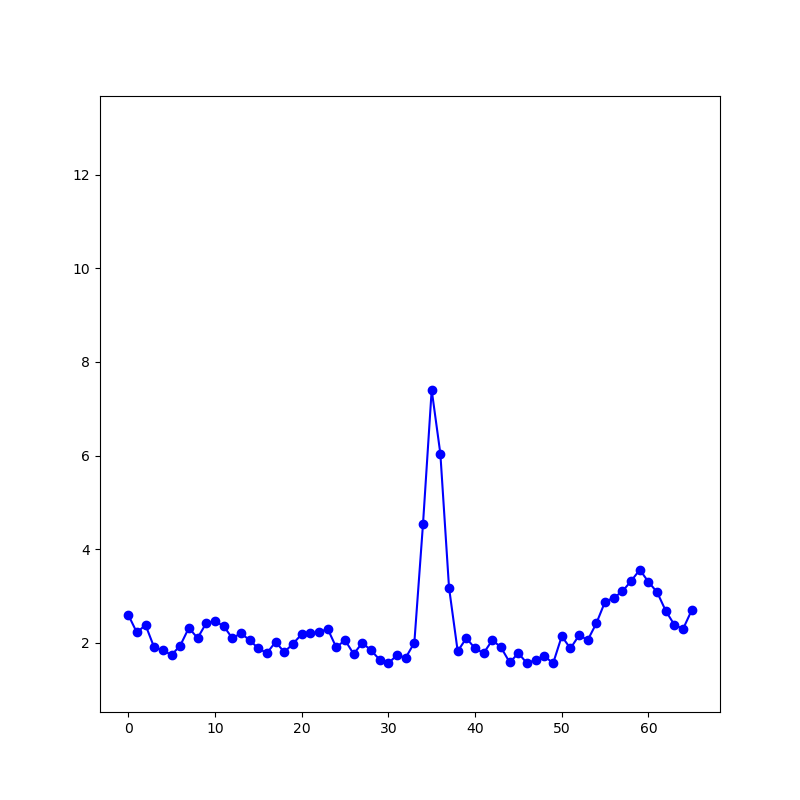

In [34]:
fig=plt.figure(figsize=(8, 8))
camera = Camera(fig)
for i in range(10000-50):
    plt.plot(avginfo[:,i], 'bo-')
    camera.snap()

animation = camera.animate(interval = 0.01, repeat=False)

<IPython.core.display.Javascript object>


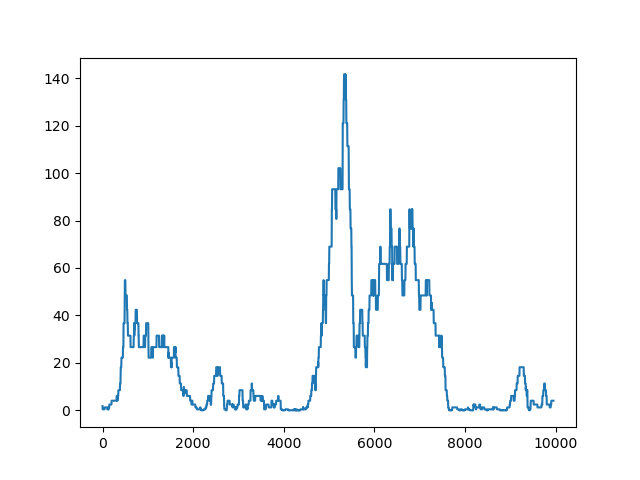

In [45]:
locmax=diff_track(avginfo, locs, 155, 10000, 50)

plt.figure()
plt.plot(locmax)

  0%|                                                    | 0/10 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


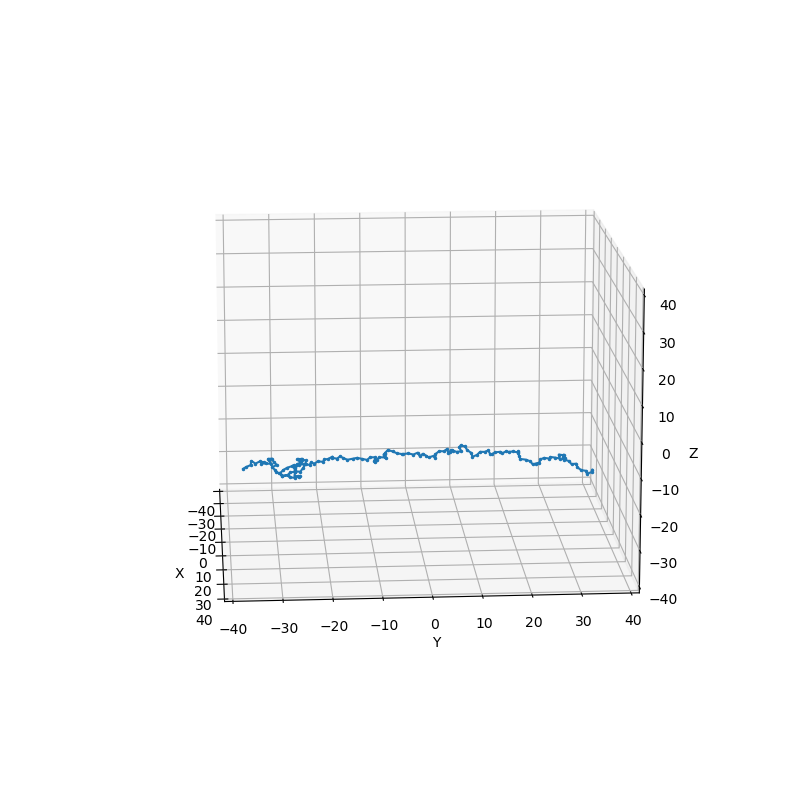

 10%|████▎                                      | 1/10 [02:48<25:17, 168.59s/it]

<IPython.core.display.Javascript object>


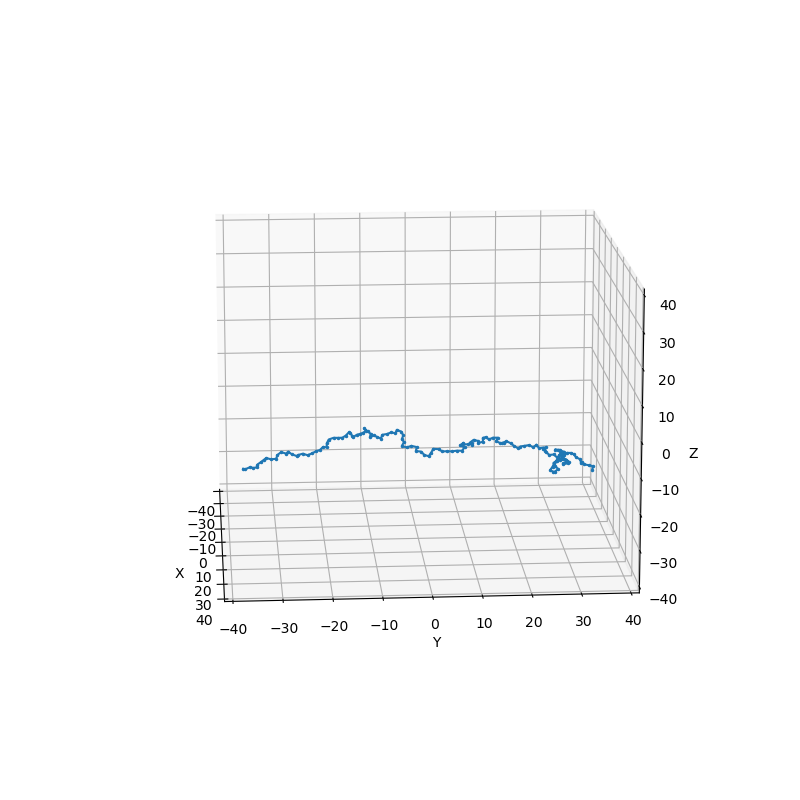

 20%|████████▌                                  | 2/10 [05:36<22:24, 168.12s/it]

<IPython.core.display.Javascript object>


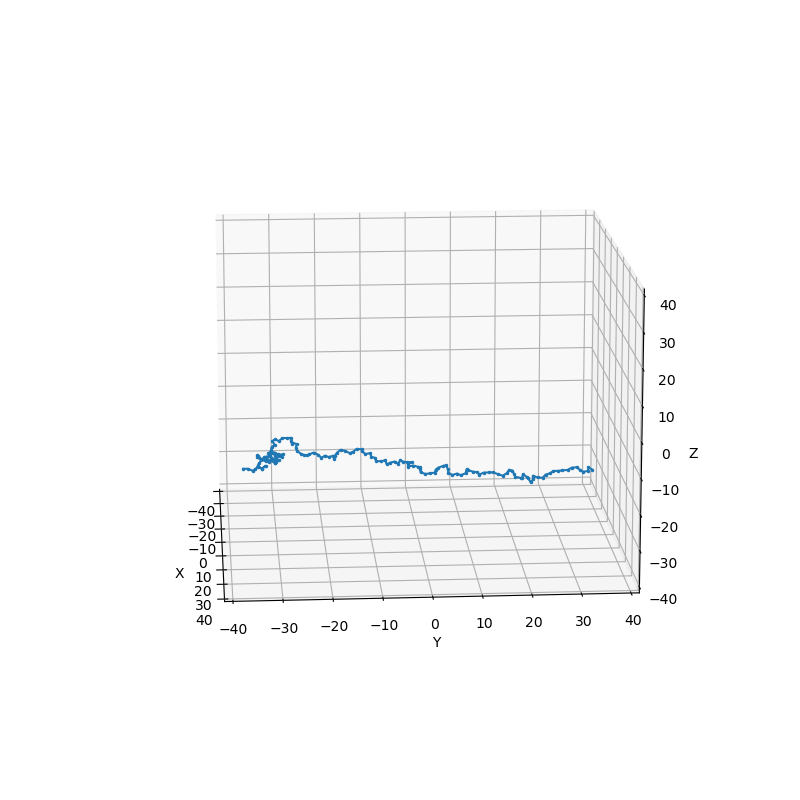

 30%|████████████▉                              | 3/10 [08:24<19:37, 168.27s/it]

<IPython.core.display.Javascript object>


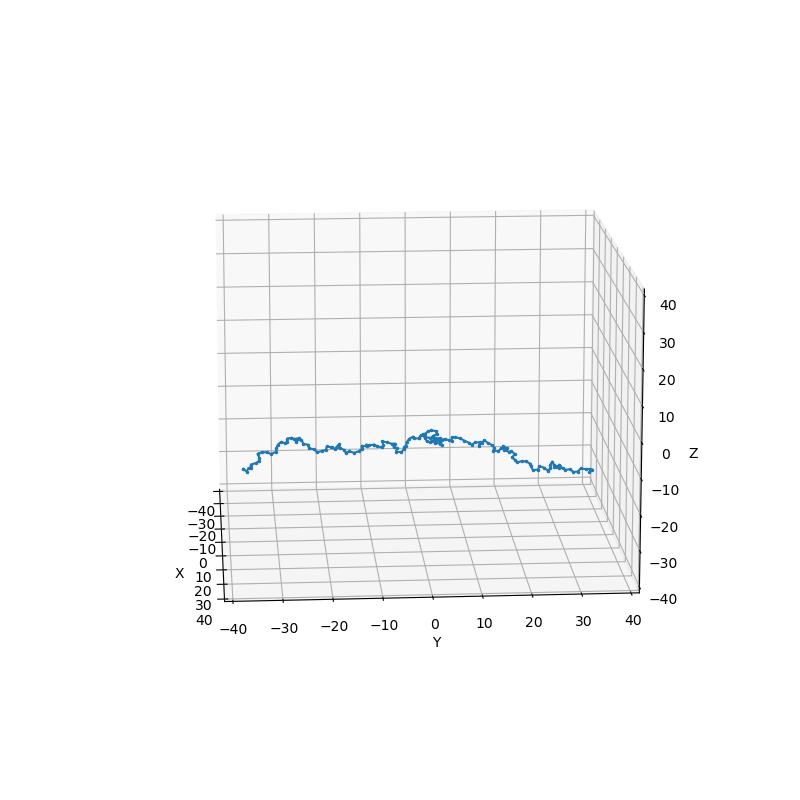

 40%|█████████████████▏                         | 4/10 [11:13<16:50, 168.38s/it]

<IPython.core.display.Javascript object>


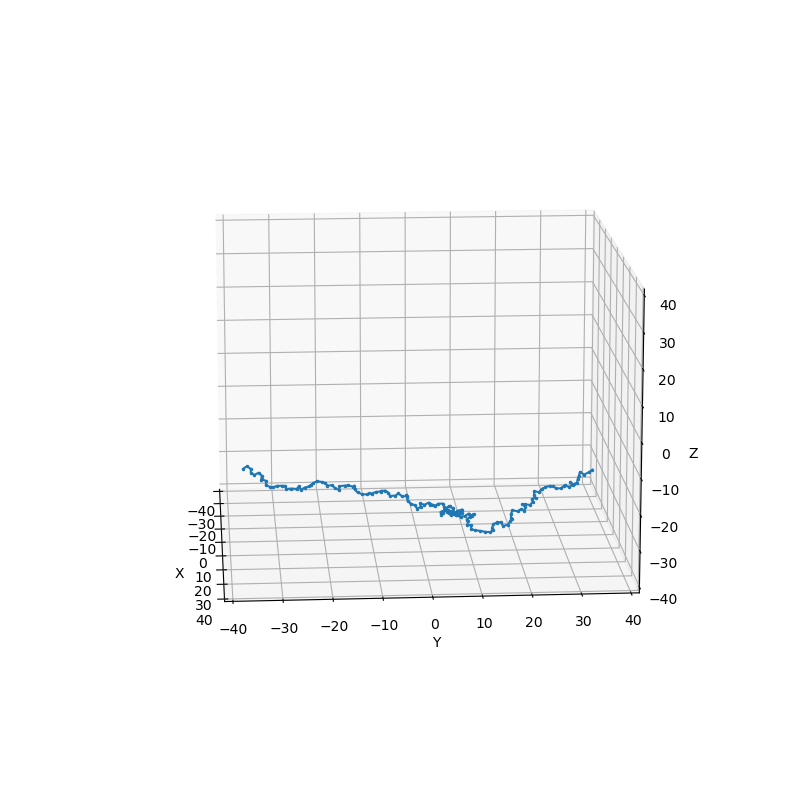

 50%|█████████████████████▌                     | 5/10 [14:01<14:01, 168.30s/it]

<IPython.core.display.Javascript object>


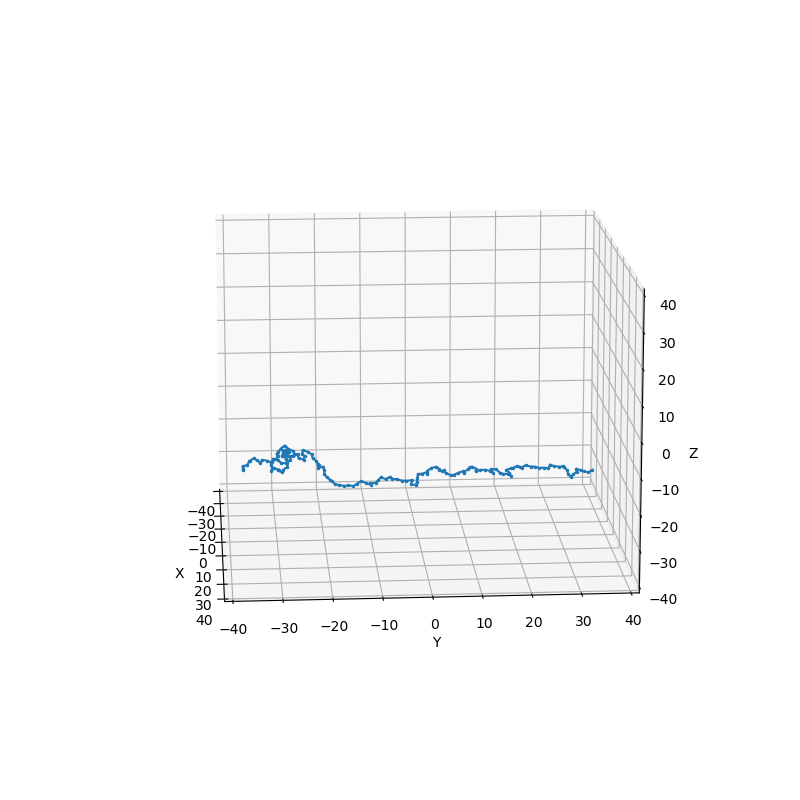

 60%|█████████████████████████▊                 | 6/10 [16:49<11:12, 168.10s/it]

<IPython.core.display.Javascript object>


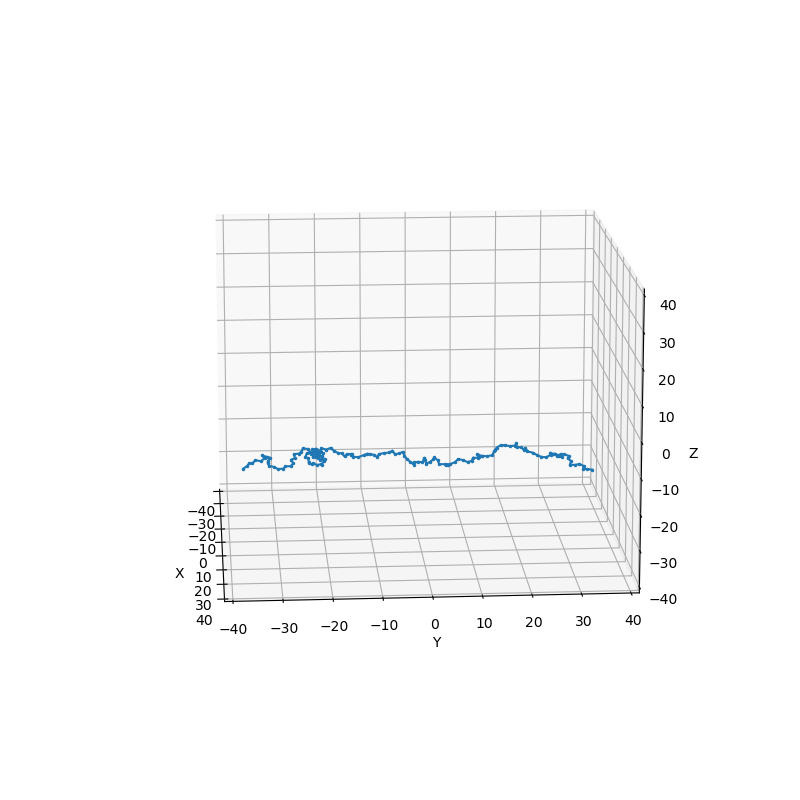

 70%|██████████████████████████████             | 7/10 [19:37<08:24, 168.14s/it]

<IPython.core.display.Javascript object>


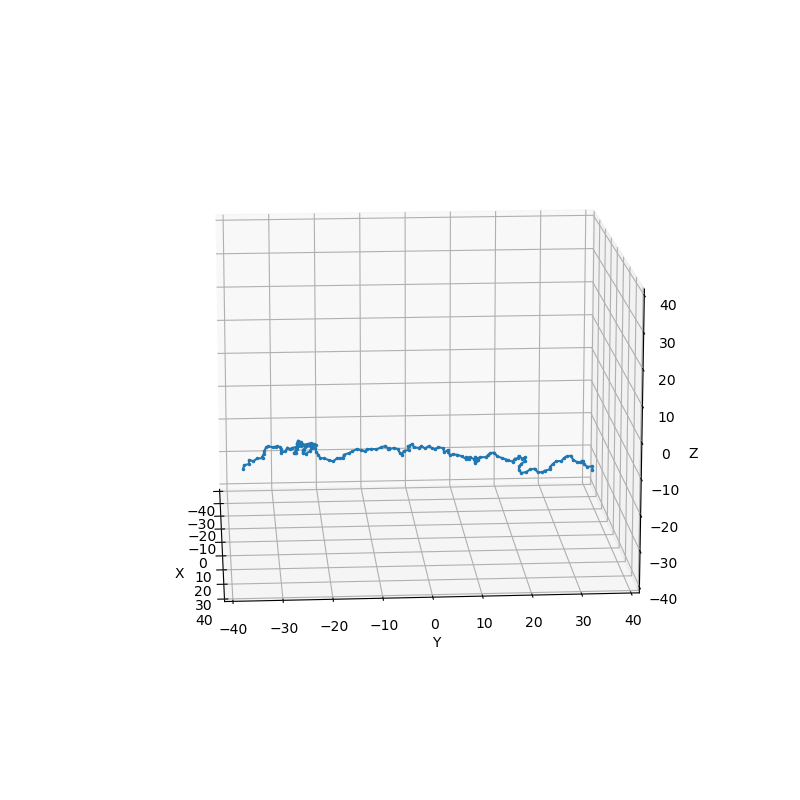

 80%|██████████████████████████████████▍        | 8/10 [22:25<05:36, 168.01s/it]

<IPython.core.display.Javascript object>


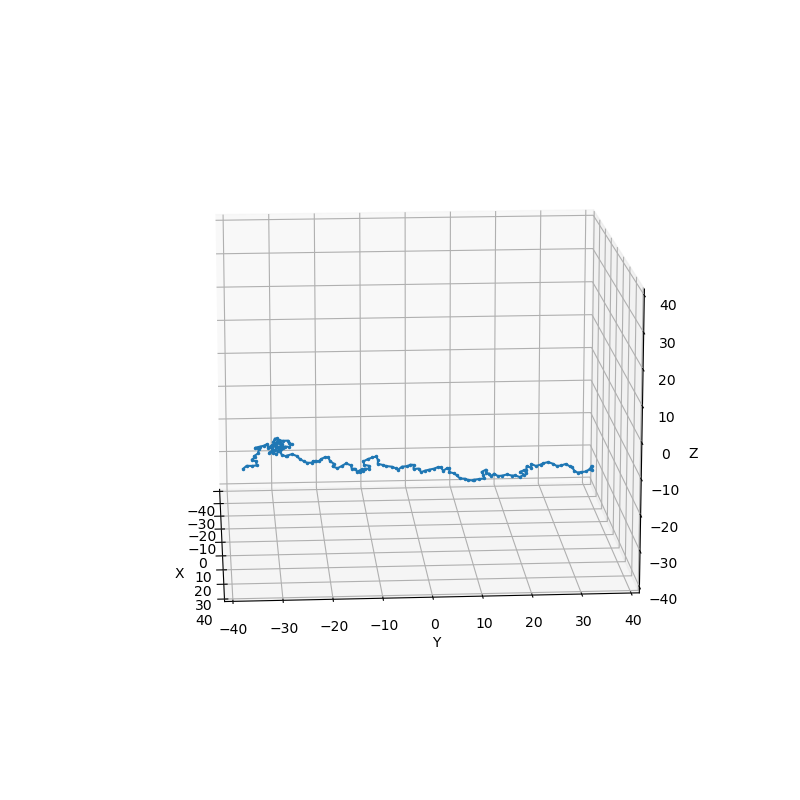

 90%|██████████████████████████████████████▋    | 9/10 [25:14<02:48, 168.29s/it]

<IPython.core.display.Javascript object>


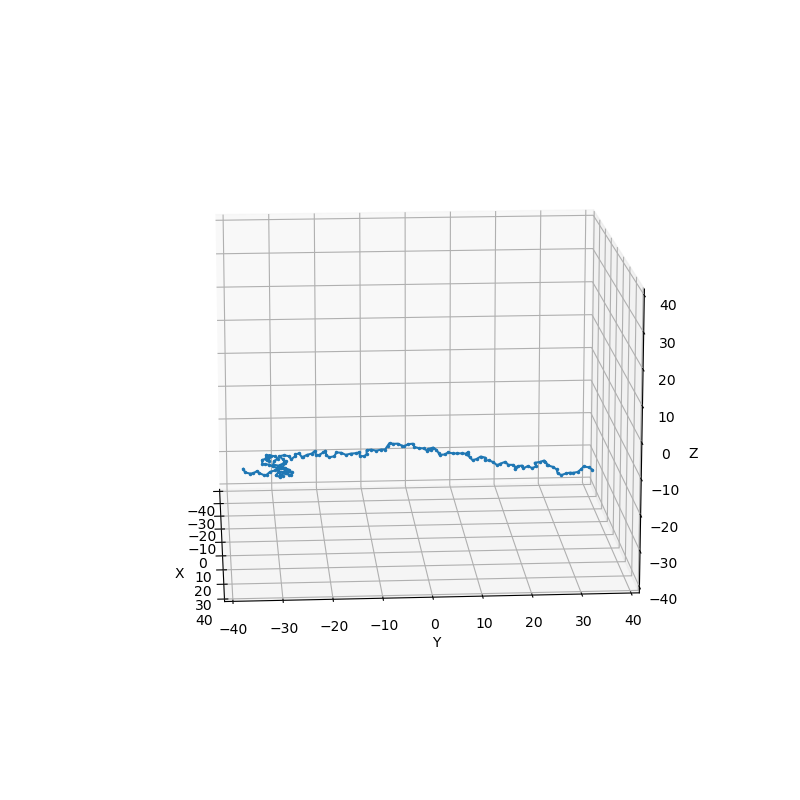

100%|██████████████████████████████████████████| 10/10 [28:01<00:00, 168.17s/it]


In [55]:
bp=155
for i in tqdm(range(1,11)):
#seed=np.random.randint(1,11)
#print('seed is ', seed)
    seed=i
    datafolder='/home/souradeep/Coding/dna_knots/155bp_t100_LJloose/seed{}/'.format(seed)
    moviedat=datafolder+'traj_0.000_0.100_155bp_dt0.005_topo_endfree.dat'
    lines=gen_data(moviedat, bp)

    fig=plt.figure(figsize=(8,8))
    ax = fig.add_subplot(projection="3d")

    line=ax.plot([], [], [])[0]
    ax.set(xlim3d=(-40, 40), xlabel='X')
    ax.set(ylim3d=(-40, 40), ylabel='Y')
    ax.set(zlim3d=(-40, 40), zlabel='Z')
    #above three lines sets the limits on x, y, z coordinates visualized. 
    ax.view_init(14, -4)
    #this line sets the initial angle of viewing, two parameters are elevation angle and azimuthal angle. 

    ani = animation.FuncAnimation(
        fig, update_coords, frames=10000, fargs=(lines, line), interval=0.001)
    # Frames = total number of frames to plot, interval = time interval between two frames in ms
    #change as required

    ani.save('155bp_t100_LJloose_seed{}.mp4'.format(i), fps=170, extra_args=['-vcodec', 'libx264'])

In [56]:
bp, iters, step, timestep, locstep = 155, 10000, 50, 10000, 2**(1/6)
locmax=np.empty((10, iters-step))
datstr='155bp_t100_LJtight/seed'

for i in tqdm(range(1,11)):
    moviedat=datstr+'{}/traj_0.000_0.100_155bp_dt0.005_topo_endfree.dat'.format(i)
    lines=gen_data(moviedat, bp)
    locs, info=box_scan(lines, bp, iters, timestep, locstep)
    avginfo=time_avg(info, step, iters)
    locmax[i-1]=diff_track(avginfo, locs, 10000, 10000, 50)
    
np.savetxt('155bp_t100_LJtight_diffavg.txt', locmax)

100%|███████████████████████████████████████████| 10/10 [09:59<00:00, 59.97s/it]


<IPython.core.display.Javascript object>


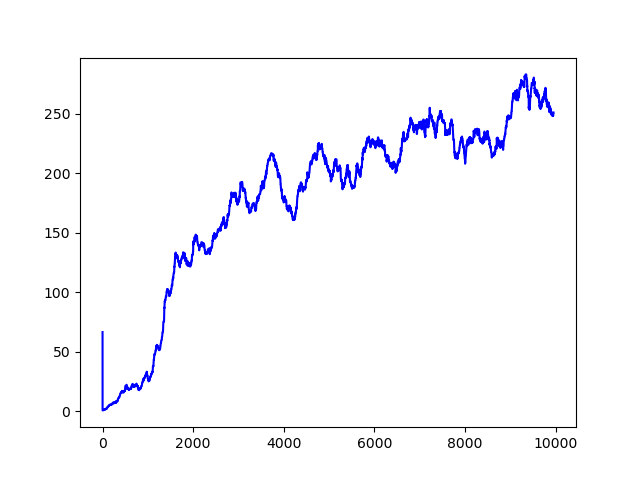

In [57]:
locmax=np.loadtxt('155bp_t100_LJtight_diffavg.txt')
diffavg=np.mean(locmax, axis=0)


plt.figure()
plt.plot(diffavg, 'b-')

  0%|                                                    | 0/10 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


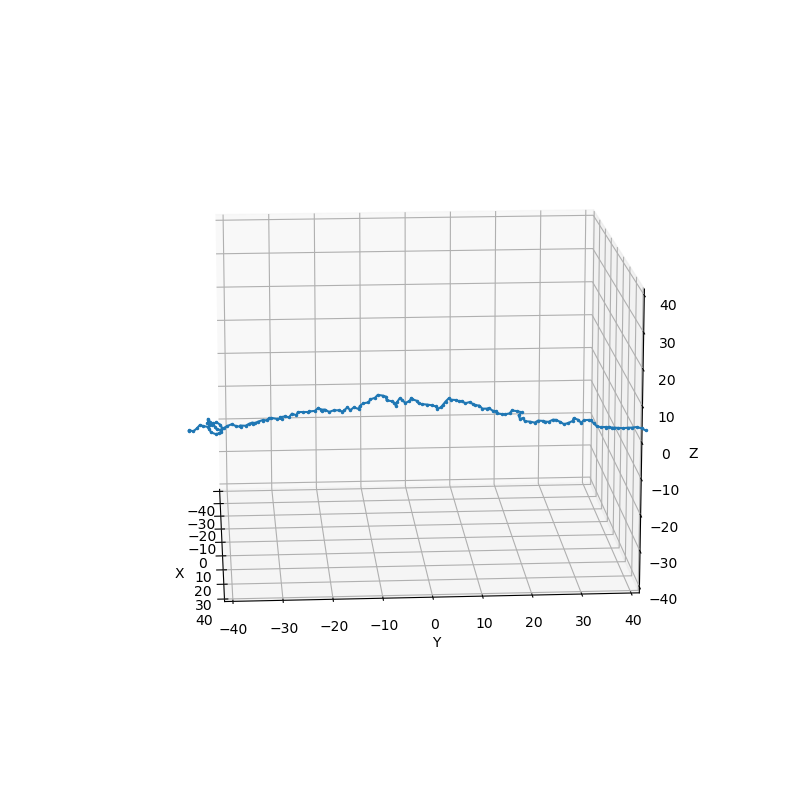

 10%|████▎                                      | 1/10 [02:47<25:10, 167.87s/it]

<IPython.core.display.Javascript object>


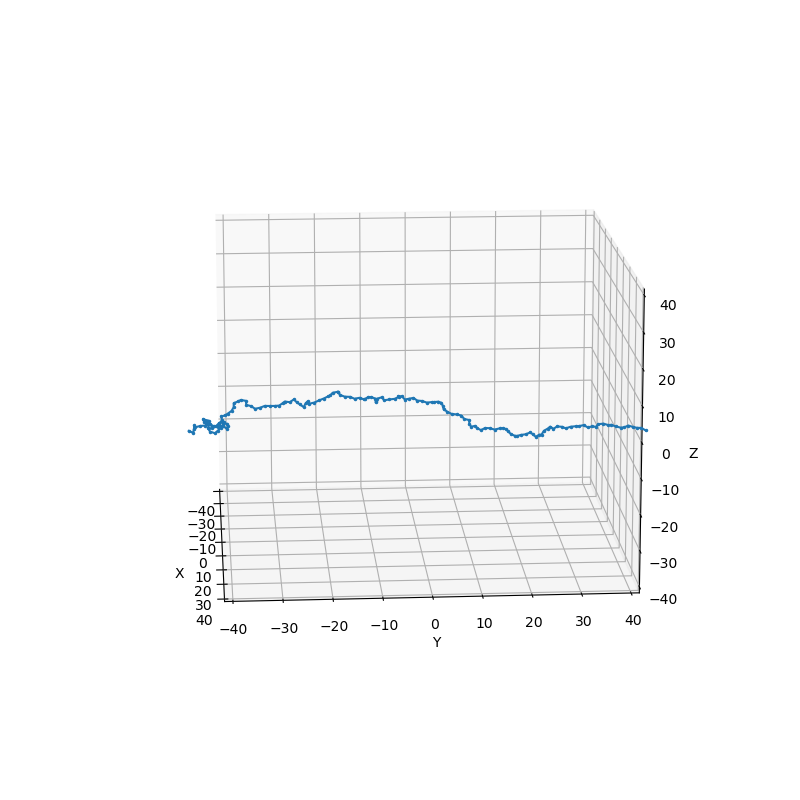

 20%|████████▌                                  | 2/10 [05:35<22:19, 167.46s/it]/tmp/ipykernel_60359/116325961.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure(figsize=(8,8))


<IPython.core.display.Javascript object>


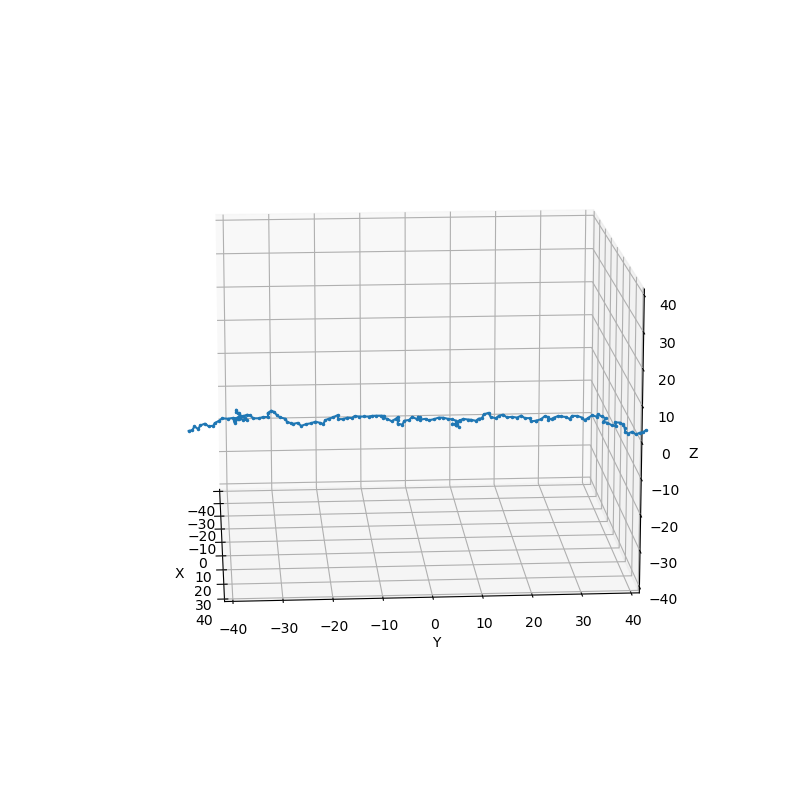

 30%|████████████▉                              | 3/10 [08:22<19:31, 167.42s/it]

<IPython.core.display.Javascript object>


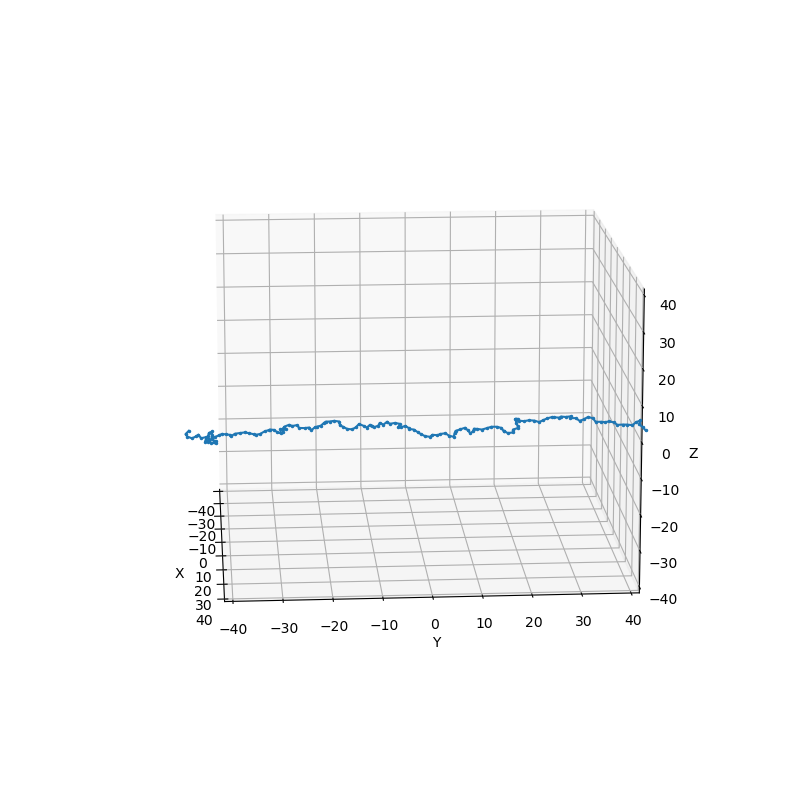

 40%|█████████████████▏                         | 4/10 [11:09<16:44, 167.45s/it]

<IPython.core.display.Javascript object>


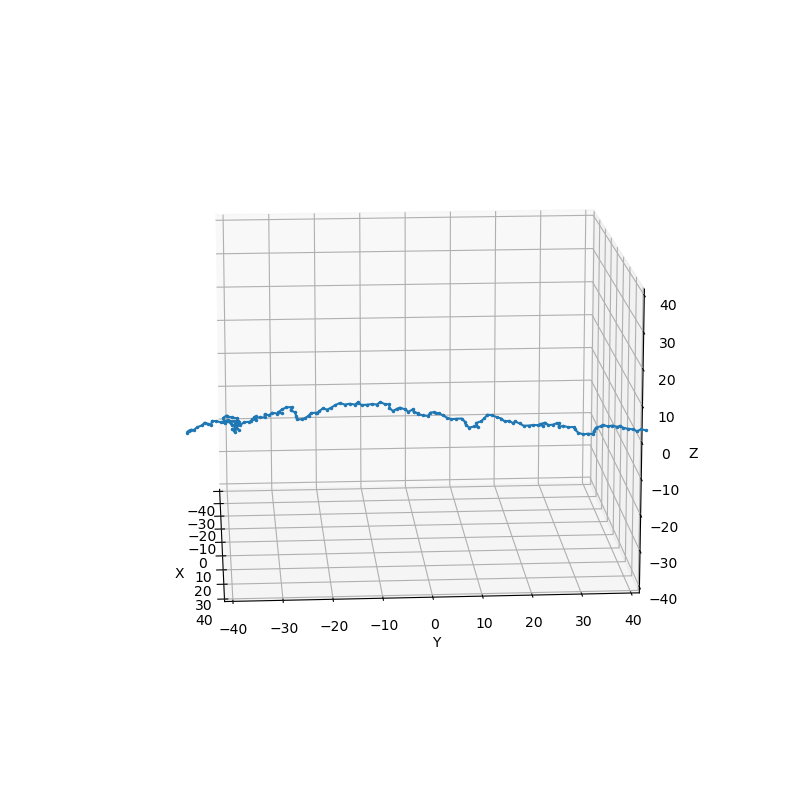

 50%|█████████████████████▌                     | 5/10 [13:57<13:57, 167.43s/it]

<IPython.core.display.Javascript object>


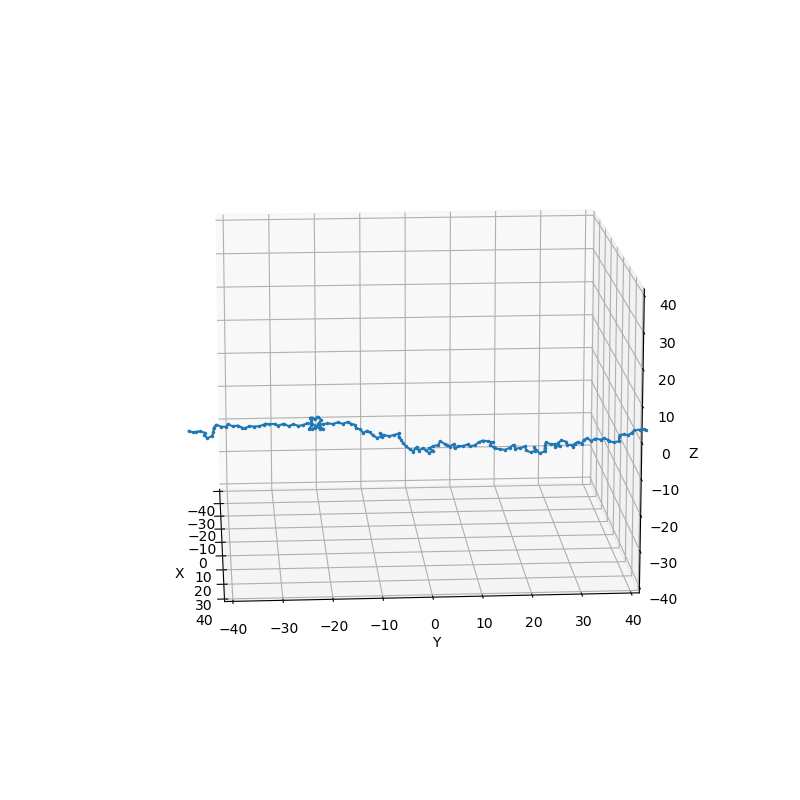

 60%|█████████████████████████▊                 | 6/10 [16:44<11:09, 167.32s/it]

<IPython.core.display.Javascript object>


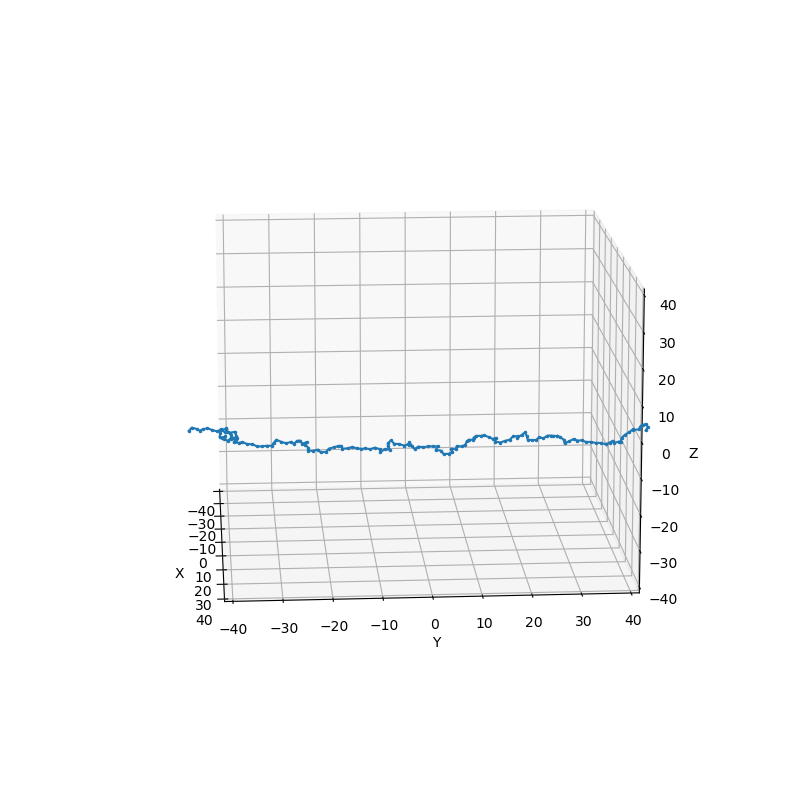

 70%|██████████████████████████████             | 7/10 [19:32<08:22, 167.50s/it]

<IPython.core.display.Javascript object>


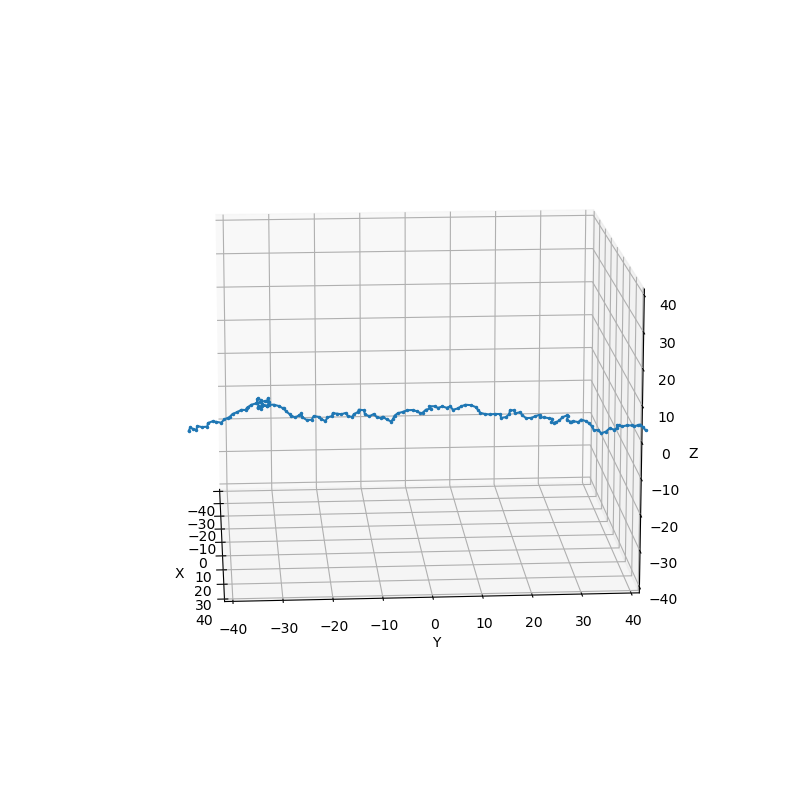

 80%|██████████████████████████████████▍        | 8/10 [22:19<05:34, 167.28s/it]

<IPython.core.display.Javascript object>


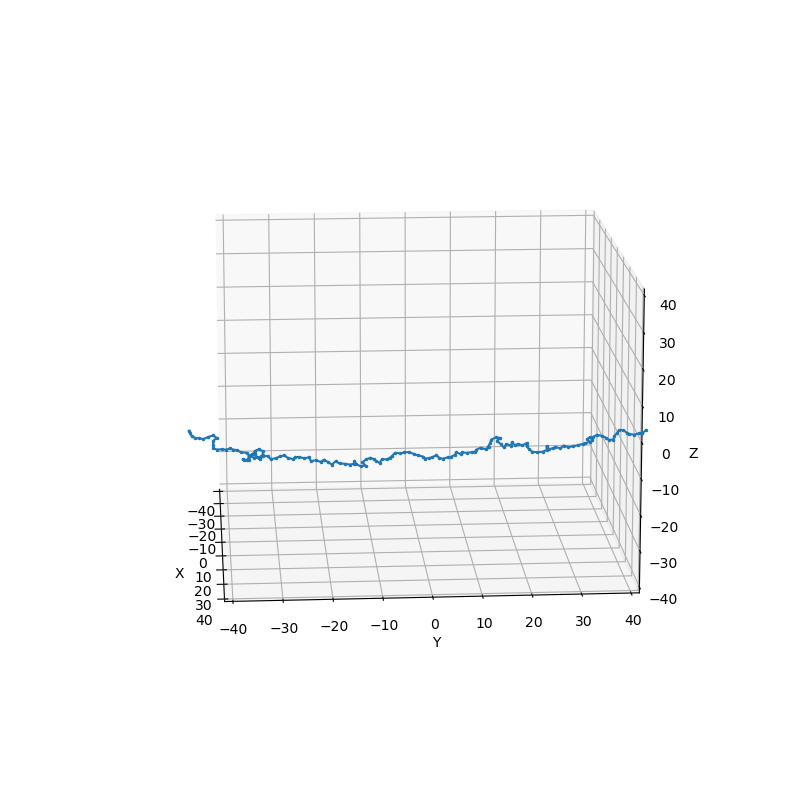

 90%|██████████████████████████████████████▋    | 9/10 [25:06<02:47, 167.42s/it]

<IPython.core.display.Javascript object>


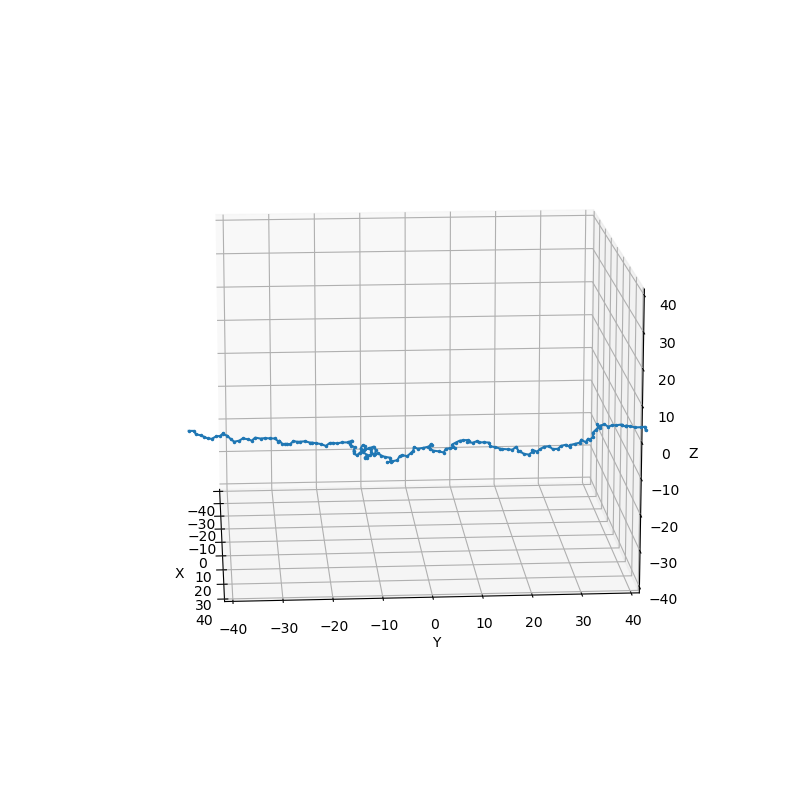

100%|██████████████████████████████████████████| 10/10 [27:54<00:00, 167.46s/it]


In [58]:
bp=155
for i in tqdm(range(1,11)):
#seed=np.random.randint(1,11)
#print('seed is ', seed)
    seed=i
    datafolder='/home/souradeep/Coding/dna_knots/155bp_t100_LJtight/seed{}/'.format(seed)
    moviedat=datafolder+'traj_0.000_0.100_155bp_dt0.005_topo_endfree.dat'
    lines=gen_data(moviedat, bp)

    fig=plt.figure(figsize=(8,8))
    ax = fig.add_subplot(projection="3d")

    line=ax.plot([], [], [])[0]
    ax.set(xlim3d=(-40, 40), xlabel='X')
    ax.set(ylim3d=(-40, 40), ylabel='Y')
    ax.set(zlim3d=(-40, 40), zlabel='Z')
    #above three lines sets the limits on x, y, z coordinates visualized. 
    ax.view_init(14, -4)
    #this line sets the initial angle of viewing, two parameters are elevation angle and azimuthal angle. 

    ani = animation.FuncAnimation(
        fig, update_coords, frames=10000, fargs=(lines, line), interval=0.001)
    # Frames = total number of frames to plot, interval = time interval between two frames in ms
    #change as required

    ani.save('155bp_t100_LJtight_seed{}.mp4'.format(i), fps=170, extra_args=['-vcodec', 'libx264'])

## More Complicated Knots

<IPython.core.display.Javascript object>


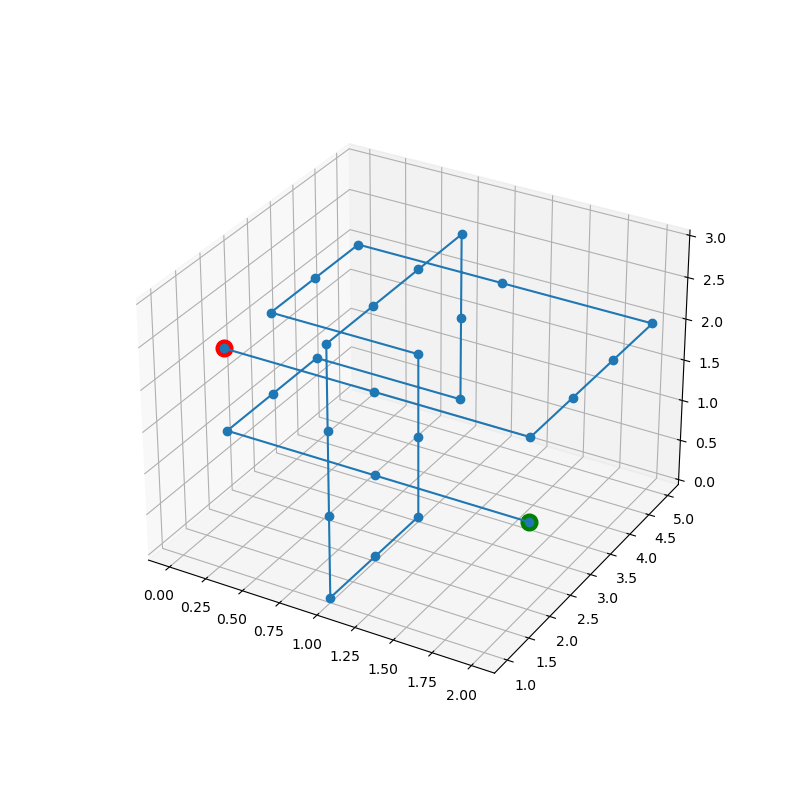

In [44]:
knot51=np.loadtxt('knot51.txt')

knot51=np.delete(knot51, [-1, -2, -3, -4, -5, -6], 0)

first, last = knot51[0], knot51[-1]

%matplotlib notebook

fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")

ax.plot(knot51[0, 0], knot51[0, 1], knot51[0, 2], 'o', color='green', ms=12)
ax.plot(knot51[-1, 0], knot51[-1, 1], knot51[-1, 2], 'o', color='red', ms=12)
ax.plot(knot51[:, 0], knot51[:, 1], knot51[:, 2], 'o-')

In [45]:
moreknot51=np.copy(knot51)
idx=1
for i in range(len(knot51)-1):
    pt1, pt2 = knot51[i], knot51[i+1]
    pt3, pt4 = (2*pt1+pt2)/3, (pt1+2*pt2)/3
    moreknot51 = np.insert(moreknot51, idx, [pt3, pt4], axis=0)
    idx+=3

print(len(moreknot51), len(knot51))
moreknot51*=3
moreknot51=np.flip(moreknot51, axis=0)

print(np.linalg.norm(moreknot51[-1]-moreknot51[-2]))

82 28
1.0


<IPython.core.display.Javascript object>


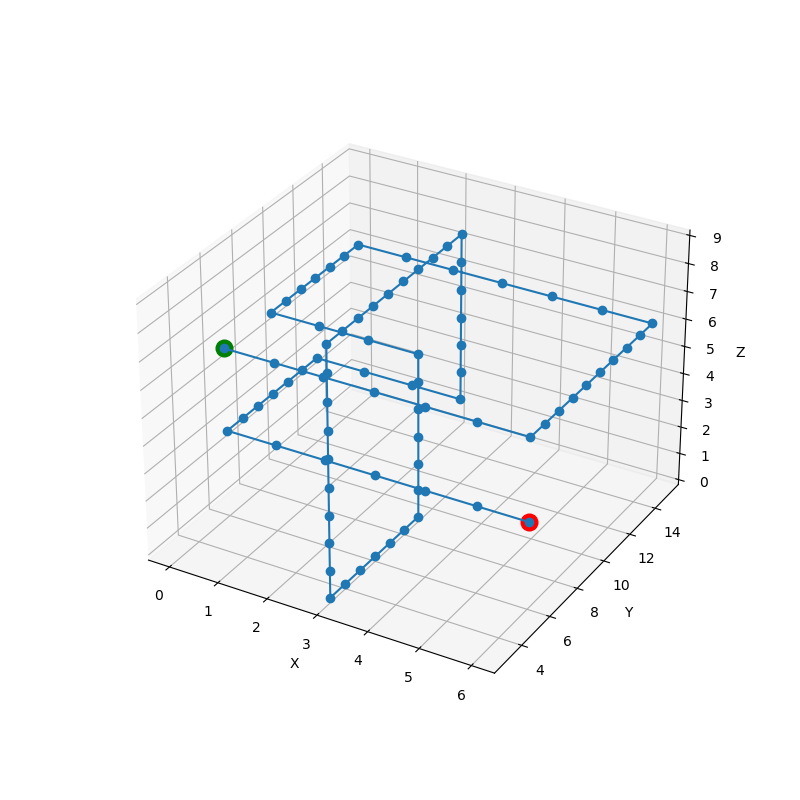

Text(0.5, 0, 'Z')

In [46]:
fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")

ax.plot(moreknot51[0, 0], moreknot51[0, 1], moreknot51[0, 2], 'o', color='green', ms=12)
ax.plot(moreknot51[-1, 0], moreknot51[-1, 1], moreknot51[-1, 2], 'o', color='red', ms=12)
ax.plot(moreknot51[:, 0], moreknot51[:, 1], moreknot51[:, 2], 'o-')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [47]:
for i in range(15):
    first, last = moreknot51[0], moreknot51[-1]
    moreknot51=np.insert(moreknot51, 0, [first[0], first[1]-1.0, first[2]], axis=0)
    moreknot51=np.insert(moreknot51, len(moreknot51), [last[0], last[1]+1.0, last[2]], axis=0)

for i in range(20):
    first, last = moreknot51[0], moreknot51[-1]
    moreknot51=np.insert(moreknot51, 0, [first[0], first[1], first[2]+1.0], axis=0)
    moreknot51=np.insert(moreknot51, len(moreknot51), [last[0], last[1], last[2]+1.0], axis=0)
    
for i in range(10):
    first, last = moreknot51[0], moreknot51[-1]
    moreknot51=np.insert(moreknot51, 0, [first[0], first[1]-1.0, first[2]], axis=0)
    moreknot51=np.insert(moreknot51, len(moreknot51), [last[0], last[1]+1.0, last[2]], axis=0)
    
moreknot51*=(2)**(1/6)
#shift=knottref[-1]

#for i in range(len(moreknot51)):
#    moreknot51[i] = moreknot51[i] - shift
    
#combknot = np.concatenate((knottref, moreknot51))

<IPython.core.display.Javascript object>


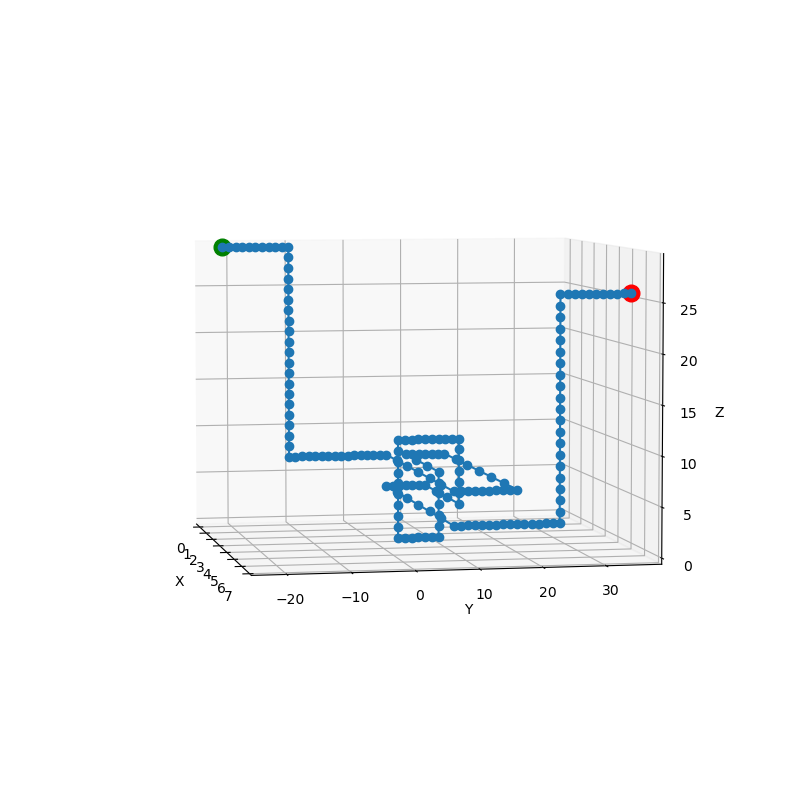

Text(0.5, 0, 'Z')

In [48]:
fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")

ax.plot(moreknot51[0, 0], moreknot51[0, 1], moreknot51[0, 2], 'o', color='green', ms=12)
ax.plot(moreknot51[-1, 0], moreknot51[-1, 1], moreknot51[-1, 2], 'o', color='red', ms=12)
ax.plot(moreknot51[:, 0], moreknot51[:, 1], moreknot51[:, 2], 'o-')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

<IPython.core.display.Javascript object>


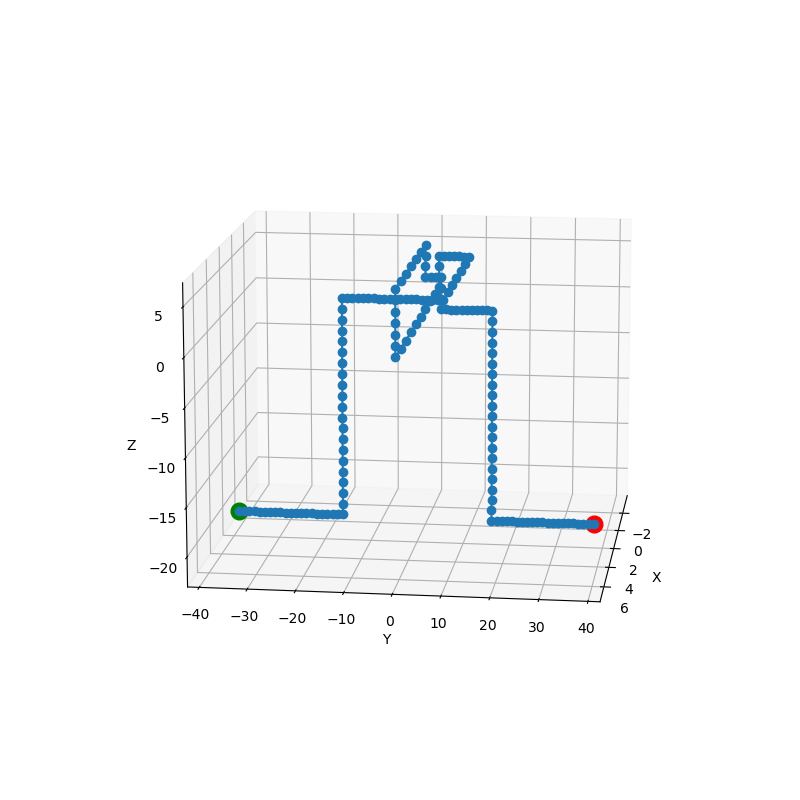

Text(0.5, 0, 'Z')

In [34]:
knottref=np.loadtxt('bigtref_loose.txt')

first, last = knottref[0], knottref[-1]

%matplotlib notebook

fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")

ax.plot(knottref[0, 0], knottref[0, 1], knottref[0, 2], 'o', color='green', ms=12)
ax.plot(knottref[-1, 0], knottref[-1, 1], knottref[-1, 2], 'o', color='red', ms=12)
ax.plot(knottref[:, 0], knottref[:, 1], knottref[:, 2], 'o-')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [33]:
shift=knottref[-1]

#for i in range(len(moreknot51)):
#    moreknot51[i] = moreknot51[i] - shift
    
#combknot = np.concatenate((knottref, moreknot51))

(155, 82)